<a href="https://colab.research.google.com/github/tanyakuznetsova/Music_Mental_Health/blob/main/Cluster_Analysis_Music_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
import seaborn as sns

In [ ]:
data = pd.read_csv('https://bitbucket.org/silverxlibra/music-mental-health/downloads/mxmh_survey_results.csv')

In [ ]:
data.shape

(736, 33)

In [ ]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Cluster Analysis: Listener's Segmentation and Exploration of Patterns Present in the Data

By performing thorough cluster analysis, we can uncover further trends and reveal coherent patterns present in the data. Clustering splits the dataset into representative segments by key characteristics; in this case, it allows us to group the participating listeners.

# Dimensionality Reduction

Each listener is represented by a 29-dimensional vector. Let's reduce this dimensionality to something that more human-interpretable and visualizable.



In [ ]:
clean_data = data.dropna()
clean_data = clean_data.drop(columns=['Timestamp', 'Composer','BPM','Permissions'])
encoder = preprocessing.LabelEncoder()
encoded_datav2 = pd.DataFrame()

for column in clean_data:
    if clean_data[column].dtype == 'object':
        encoded_datav2[column] = encoder.fit_transform(clean_data[column])
    else:
        encoded_datav2[column] = clean_data[column]

encoded_datav2.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4,4.0,0,0,15,0,1,0,0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,5,2.5,1,0,6,1,1,2,0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,4,4.0,1,0,12,1,0,0,0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,4,5.0,1,1,6,1,1,1,2,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,5,3.0,1,1,15,1,1,2,0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0


In [ ]:
encoded_datav2.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Fav genre', 'Exploratory', 'Foreign languages',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects'],
      dtype='object')

In [ ]:
features = ['Age', 'Hours per day', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music effects']

select_data = encoded_datav2[features]

In [ ]:
select_data

,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4.0,0,0,3,0,0,1,1,3,...,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,2.5,2,0,0,1,2,0,3,2,...,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,4.0,0,0,1,0,1,3,0,3,...,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,5.0,1,2,0,0,0,2,3,3,...,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,3.0,2,0,1,2,1,1,2,0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,3,1,0,2,0,2,1,0,...,3,0,1,3,0,7.0,6.0,0.0,9.0,0
732,18.0,1.0,1,1,0,0,0,0,1,0,...,3,0,0,2,2,3.0,2.0,2.0,5.0,0
733,19.0,6.0,1,2,2,1,1,3,1,1,...,2,2,2,1,1,2.0,2.0,2.0,2.0,0
734,19.0,5.0,3,0,0,0,0,0,1,0,...,0,0,0,0,2,2.0,3.0,2.0,1.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(select_data)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_ = PCA()
pca_.fit(X)

PCA()

In [ ]:
pca_.explained_variance_ratio_

array([0.15052767, 0.09889235, 0.08822028, 0.06823703, 0.0643954 ,
       0.05323326, 0.04845363, 0.04165836, 0.03991496, 0.03811361,
       0.03489126, 0.0323921 , 0.03083889, 0.03022205, 0.02836269,
       0.02514443, 0.02420914, 0.02322419, 0.02188821, 0.01657873,
       0.01626091, 0.01567895, 0.00866189])

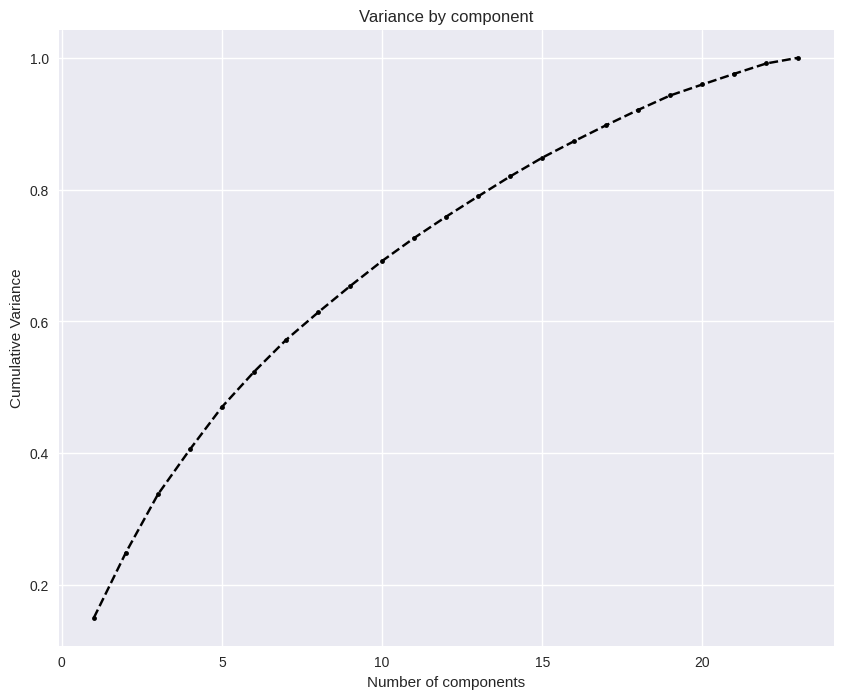

In [ ]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize = (10, 8))
plt.plot(range(1, 24),
         pca_.explained_variance_ratio_.cumsum(),
         marker = ".",
         linestyle = '--',
         c = 'black')

plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.title('Variance by component')
plt.show()

This graph suggests that 80% of the variance can be explained by 13 features.

In [ ]:
pca = PCA(n_components = 13)
reduced_data = pca.fit_transform(X)

print(type(reduced_data))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.cluster import KMeans

within_clusters_sum_of_squares = []

#let's explore up to 15 clusters
for i in range(1, 16):
  kmeans_pca = KMeans(n_clusters = i,
                      init = 'k-means++',
                      n_init = 'auto',
                      random_state = 100)
  kmeans_pca.fit(reduced_data)
  within_clusters_sum_of_squares.append(kmeans_pca.inertia_)

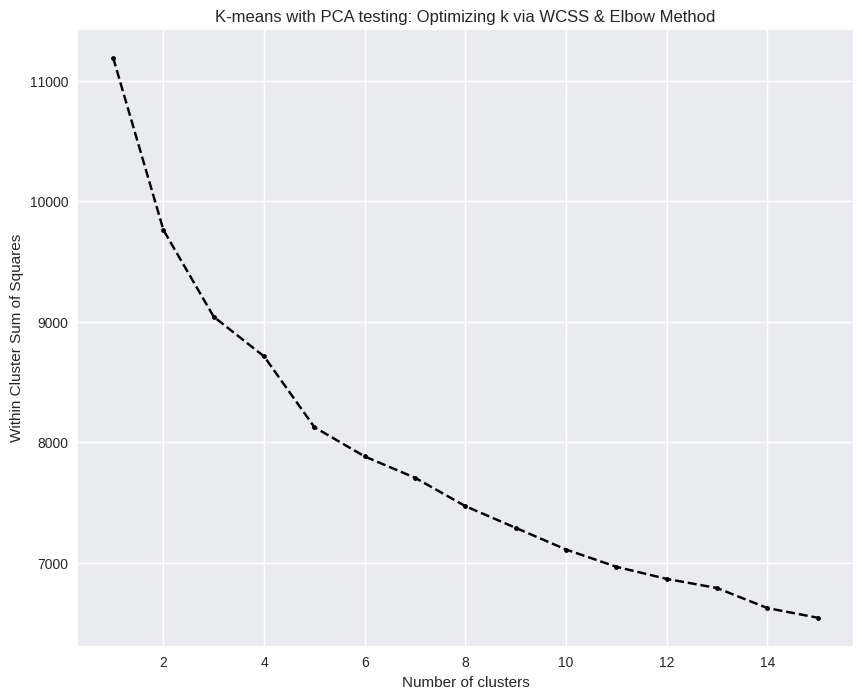

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 16),
         within_clusters_sum_of_squares,
         marker = ".",
         linestyle = '--',
         c = 'black')

plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('K-means with PCA testing: Optimizing k via WCSS & Elbow Method')
plt.show()

In [ ]:
!pip install kneed -q
from kneed import KneeLocator

kl = KneeLocator(range(1, 16), within_clusters_sum_of_squares,
                 curve="convex", direction="decreasing")
print(f'The suggested num of clusters is {kl.elbow}')

The suggested num of clusters is 5


Using the elbow method, we can see that the law of diminishing returns kicks in at about 5 clusters, which suggests that this would be a good number to aim for.

In [ ]:
from sklearn.cluster import KMeans
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters,
                random_state = 100,
                init='k-means++',
                n_init = 'auto')

In [ ]:
kmeans.fit(reduced_data)

KMeans(n_clusters=5, n_init='auto', random_state=100)

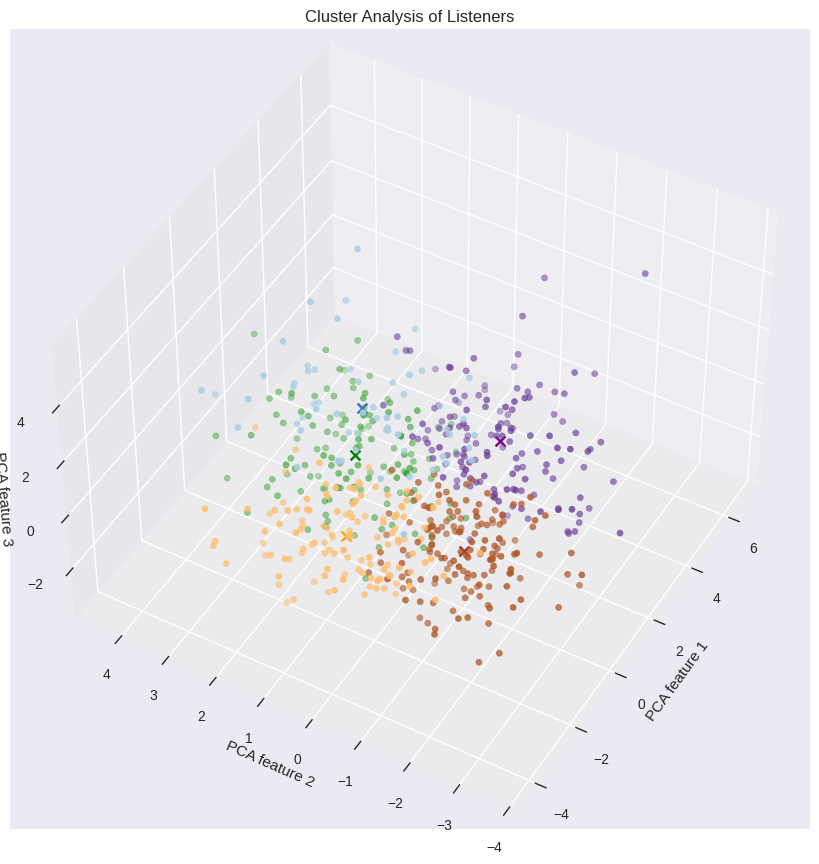

In [ ]:
import mpl_toolkits.mplot3d

fig = plt.figure(1, figsize=(10, 8))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=45, azim=-150)
ax.set_position([0, 0, 0.95, 1])

ax.scatter(reduced_data[:, 0],
           reduced_data[:, 1],
           reduced_data[:, 2],
           c = kmeans.labels_,
           cmap = 'Paired'
           )
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')
plt.title('Cluster Analysis of Listeners')

colors = ['royalblue', 'green', 'orange', 'purple', 'brown']
for i, coor in enumerate(kmeans.cluster_centers_):
    ax.scatter(coor[0], coor[1], coor[2], s=50,
               c = colors[i],
               marker='x')

plt.show()

### Evaluation with the Silhouette Score

The silhouette score is one metric that allows us to evaluate the obtained clusters:

In [42]:
from sklearn.metrics import silhouette_score

cluster_labels = kmeans.fit_predict(reduced_data)
silhouette_avg = silhouette_score(reduced_data, cluster_labels)

print(f'For {n_clusters} n-clusters, the average silhouette score is {silhouette_avg}')

For 5 n-clusters, the average silhouette score is 0.09200825795722964


The results are ambiguous: the silhouete score very close to 0 indicates that there is a high chance that a given data point can be assigned to another cluster. This is still informative, although by no means definitive and requires a careful closer look manually.

## Evaluation with descriptive statistics and manual exploration

In [ ]:
clustered_data = pd.DataFrame(select_data, columns=select_data.columns)
clustered_data['Cluster'] = kmeans.labels_+1


clustered_data.head()

,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Cluster
2,18.0,4.0,0,0,3,0,0,1,1,3,...,0,1,1,3,7.0,7.0,10.0,2.0,1,5
3,61.0,2.5,2,0,0,1,2,0,3,2,...,2,0,0,0,9.0,7.0,3.0,3.0,0,1
4,18.0,4.0,0,0,1,0,1,3,0,3,...,3,3,0,1,7.0,2.0,5.0,9.0,0,2
5,18.0,5.0,1,2,0,0,0,2,3,3,...,3,3,3,0,8.0,8.0,7.0,7.0,0,4
6,18.0,3.0,2,0,1,2,1,1,2,0,...,1,0,0,2,4.0,8.0,6.0,0.0,0,3


In [ ]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def parallel_plot(data):
	my_colors = list(islice(cycle(['royalblue', 'orange', 'green','purple','darkgray']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([0, 80]) #controls the range of the y axis
	plt.xticks(rotation='vertical')
	parallel_coordinates(data, 'Cluster', color = my_colors, marker='o')

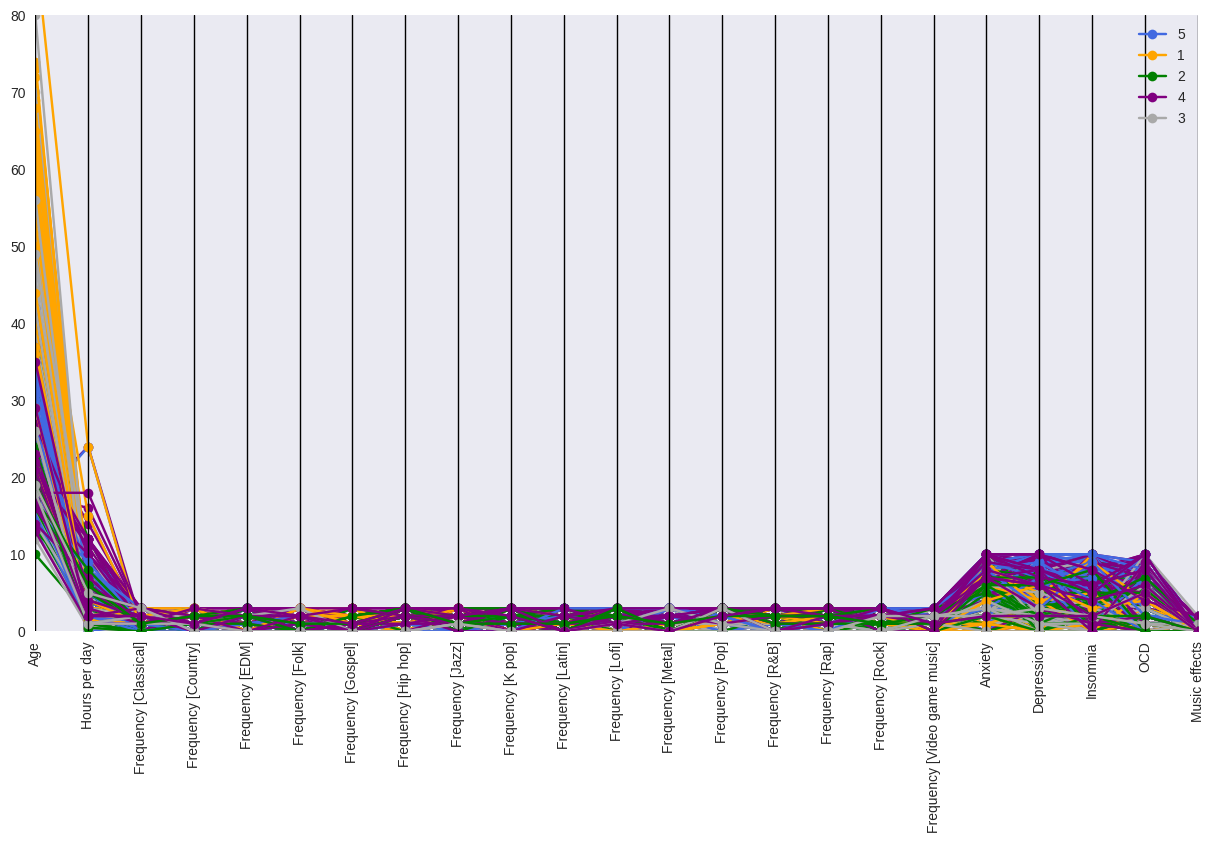

In [ ]:
parallel_plot(clustered_data)

It is clear that age as well as the number of hours of music per day has a lot of influence on the cluster formation. Additionally, we can see that Insomnia is particularly prevalent in Cluster 5.

Let's have a closer look at the clusters and investigate them for the coherent patterns the data revealed.

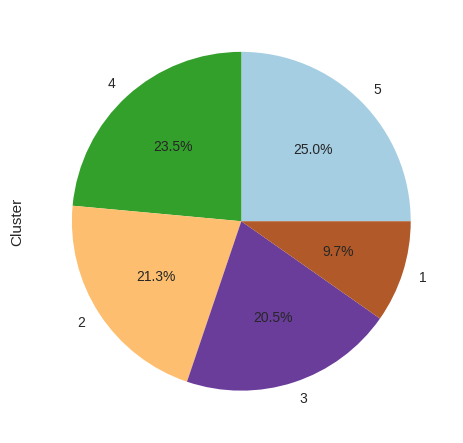

In [ ]:
clustered_data['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',
                                              cmap = 'Paired'
                                              )
plt.show()

In [ ]:
def cluster_descriptive_statistics(clustered_data):
    #group the data by cluster
    grouped_data = clustered_data.groupby('Cluster')

    #compute descriptive statistics for each cluster
    cluster_statistics = grouped_data.describe(include = 'all')

    return cluster_statistics

In [ ]:
cluster_statistics = cluster_descriptive_statistics(clustered_data)
cluster_statistics.head(3)

Age                                                        \
         count       mean        std   min    25%   50%    75%   max   
Cluster                                                                
1         60.0  44.833333  18.897733  16.0  26.00  49.0  59.25  89.0   
2        131.0  19.877863   5.304603  10.0  17.00  18.0  21.00  49.0   
3        126.0  26.293651  11.675662  12.0  18.25  22.5  30.75  80.0   

        Hours per day            ...  OCD       Music effects            \
                count      mean  ...  75%   max         count      mean   
Cluster                          ...                                      
1                60.0  3.479167  ...  2.0   5.0          60.0  0.316667   
2               131.0  3.267176  ...  4.0  10.0         131.0  0.152672   
3               126.0  2.398810  ...  3.0  10.0         126.0  0.420635   

                                            
              std  min  25%  50%  75%  max  
Cluster                                     
1        0.469102  0.0  0.0  0.0  1.0  1.0  
2        0.381763  0.0  0.0  0.0  0.0  2.0  
3        0.584509  0.0  0.0  0.0  1.0  2.0  

[3 rows x 184 columns]

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)
#cluster 1
cluster_statistics.iloc[0]

Age                           count    60.000000
                              mean     44.833333
                              std      18.897733
                              min      16.000000
                              25%      26.000000
                              50%      49.000000
                              75%      59.250000
                              max      89.000000
Hours per day                 count    60.000000
                              mean      3.479167
                              std       3.757561
                              min       0.250000
                              25%       1.375000
                              50%       2.000000
                              75%       4.000000
                              max      24.000000
Frequency [Classical]         count    60.000000
                              mean      1.650000
                              std       0.860134
                              min       0.000000
                    

**Cluster 1 inference:**

* average age is **44**
* number of hours of listening to music per day ≈ **3.47**
* preferred genres are **rock, pop, jazz, folk**, and **country** (derived the mean frequency of listening)
* most often occurring mental health conditions are quite **mild anxiety** and **mild insomnia**.

This is the smallest segment, the oldest demographic, and they seem to enjoy the best mental health.

In [ ]:
cluster_statistics.iloc[1] #second cluster

Age                           count    131.000000
                              mean      19.877863
                              std        5.304603
                              min       10.000000
                              25%       17.000000
                              50%       18.000000
                              75%       21.000000
                              max       49.000000
Hours per day                 count    131.000000
                              mean       3.267176
                              std        2.170872
                              min        0.500000
                              25%        2.000000
                              50%        3.000000
                              75%        4.000000
                              max       12.000000
Frequency [Classical]         count    131.000000
                              mean       1.022901
                              std        0.915387
                              min        0.000000


**Cluster 2 inference:**

*   average age is **19**, quite young demographic
*   listen to music ≈ **3.27** hrs per day
*   favorite genres are **hip-hop, pop, r&b,** and **rap**.
*   almost never listen to country, folk, or metal.
*   they report moderate to considerable **anxiety**, their dominant mental health condition

In [ ]:
cluster_statistics.iloc[2] #third cluster

Age                           count    126.000000
                              mean      26.293651
                              std       11.675662
                              min       12.000000
                              25%       18.250000
                              50%       22.500000
                              75%       30.750000
                              max       80.000000
Hours per day                 count    126.000000
                              mean       2.398810
                              std        1.825426
                              min        0.000000
                              25%        1.000000
                              50%        2.000000
                              75%        3.000000
                              max       10.000000
Frequency [Classical]         count    126.000000
                              mean       1.611111
                              std        1.073106
                              min        0.000000


**Cluster 3 inference:**

*   average age is **26**
*   **lower** than overall average time of listening to music per day at **2.4** hrs a day
*   favor the most popular overall genres such as **pop** and **rock**. Exhibit **no distinct preferences**
*   **mild to moderate anxiety** and **depression** levels

This is by far **the least distinct segment** with few distinguishing features. We discovered some fairly middle of the line people.

In [ ]:
cluster_statistics.iloc[3] #fourth cluster

Age                           count    145.000000
                              mean      22.524138
                              std        6.789578
                              min       13.000000
                              25%       18.000000
                              50%       21.000000
                              75%       24.000000
                              max       49.000000
Hours per day                 count    145.000000
                              mean       4.944828
                              std        3.615705
                              min        0.500000
                              25%        2.500000
                              50%        4.000000
                              75%        6.000000
                              max       24.000000
Frequency [Classical]         count    145.000000
                              mean       1.641379
                              std        0.847184
                              min        0.000000


**Cluster 4 inference:**

*   average age is **22.5**
*   **higher** than overall average time of listening to music per day at almost **5** hrs a day
*   favor genres such as **pop, rock, r&b, rap** and **hip hop**
*   **severe anxiety** and **depression** levels paired with **mild to moderate insomnia** and **OCD**.

This group is by far **the most affected** by various mental health conditions and they also **consume music at a higher rate** than others.


In [ ]:
cluster_statistics.iloc[4] #fifth cluster

Age                           count    154.000000
                              mean      22.071429
                              std        6.131572
                              min       13.000000
                              25%       17.000000
                              50%       21.000000
                              75%       25.000000
                              max       42.000000
Hours per day                 count    154.000000
                              mean       4.056494
                              std        3.207323
                              min        0.000000
                              25%        2.000000
                              50%        3.000000
                              75%        5.000000
                              max       24.000000
Frequency [Classical]         count    154.000000
                              mean       0.928571
                              std        0.879001
                              min        0.000000


**Cluster 5 inference:**

* similar average age as cluster 4, **22**
* also **slightly higher** than overall average rate of listening to music per day at **4** hrs
* this group is notably into such genres as **rock and metal**
* **moderate to high levels of anxiety** and **depression** and, notably, **insomnia**, which is visible in the parallel plots (but *not* OCD)

## Visualizations and Further Interpetations of Clustering

Let's calculate the overall Mental Health Severity Score based on the four reported mental health conditions.

With this new engineered feature, we can compare how the clusters differ from each other when fitted with a trend line for the overall mental health score.

In [ ]:
clustered_data['MH Score'] = np.mean(clustered_data.iloc[:, 18:22], axis=1)
clustered_data.head()

,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Cluster,MH Score
2,18.0,4.0,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,1,5,6.50
3,61.0,2.5,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,0,1,5.50
4,18.0,4.0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,0,2,5.75
5,18.0,5.0,1,2,0,0,0,2,3,3,1,3,1,3,3,3,3,0,8.0,8.0,7.0,7.0,0,4,7.50
6,18.0,3.0,2,0,1,2,1,1,2,0,1,1,1,1,1,0,0,2,4.0,8.0,6.0,0.0,0,3,4.50


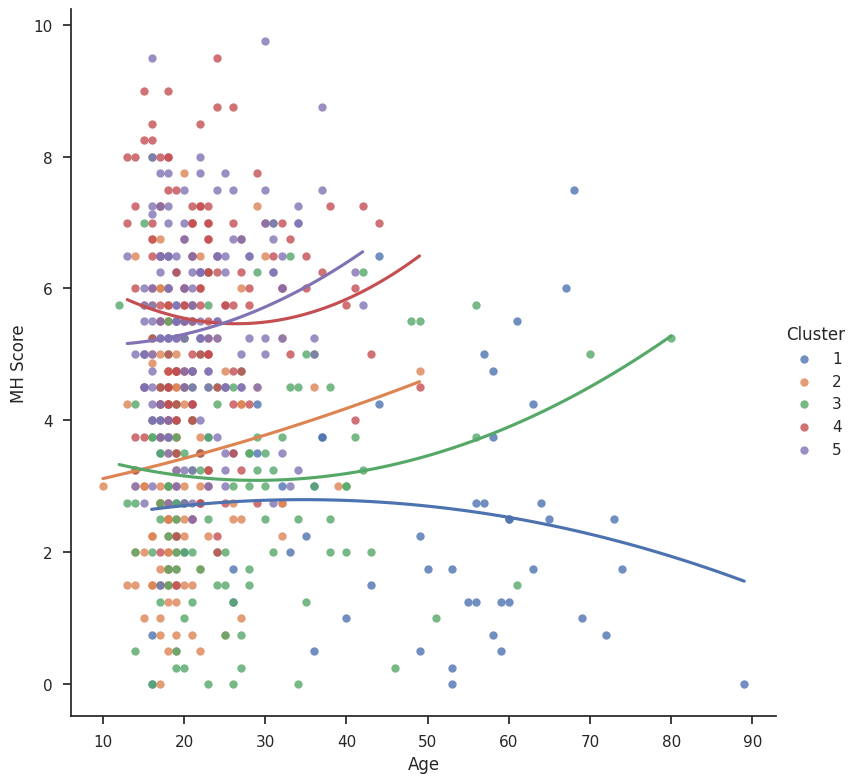

In [ ]:
sns.set(style="ticks")

#scatter plot for each cluster with regression line
sns.lmplot(x="Age",
           y="MH Score",
           data=clustered_data,
           hue='Cluster',
           #col='Cluster', # uncomment for individual cluster plots
           order = 2, #polynomial trend line, comment out for linear
           ci=None, aspect=1,
           height=8)

plt.show()

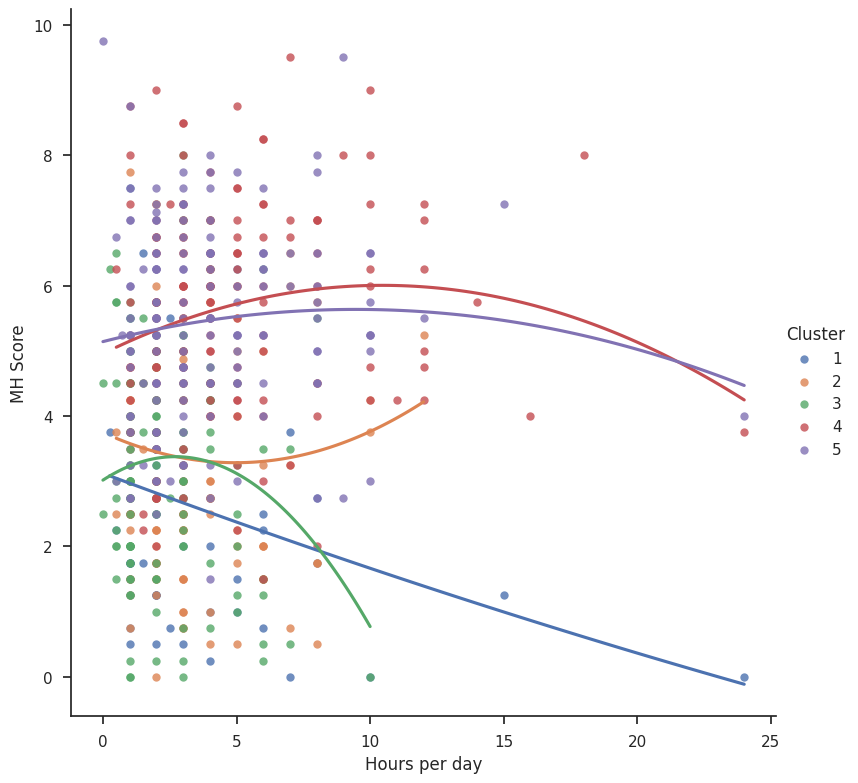

In [ ]:
sns.lmplot(x="Hours per day",
           y="MH Score",
           data=clustered_data,
           hue='Cluster',
           #col='Cluster', # uncomment for individual cluster plots
           order = 2,  #polynomial trend line, comment out for linear
           ci=None,
           aspect=1,
           height=8)

plt.show()

## Inference

The plots above investigate the relationship between the mental health and the two prominent features: age and hours of music per day.

**Age and Mental Health Findings**

As far as age is concerned, older demographics appear to have a trend for better mental health as evidenced by the lowering of the score for Cluster 1. (Our cluster one is older than the rest of the dataset, with an average age of 44 and they are generally the least affected by mental health conditions). For them, the Mental Health severity score has a trend of **decreasing with age**.

For the other four clusters, however, there is **no such relationship**. For them, the mental health severity score **drops around their 30s** but **picks up again later** in life.

**Hours of Music a Day and Mental Health Findings**

There is a mixed picture regarding the relationship between how much participants listen to music and their mental health score. For Clusters 1 and 3 (our older demographics and the least distinctive segment that just likes generally popular genres) the severity score of the mental health decreases the more they listen to music per day.

For Cluster 2, which is the youngest people heavily into hip hop and r&b and struggle with anxiety, the sweet spot is about 5 hours a day after which is picks up again.

For Clusters 4 and 5, which is our young heavy listeners of hip hop/r&b/rap who suffer from anxiety and insomnia, and rock and metal lovers, the data suggests that listening to music 5-10 hours a day leads to worse mental health.

This trend only lowers for much longer periods of listening to music, such as having it on around the clock. That, however, has only a few data points to confirm it, and therefore shoud be viewed as tentative and inconclusive. 3-4 hours of music a day generally seems to be the best amount.